In [1]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def apriori(x_0, x_1, epsilon, alpha):
    return math.floor(math.log(epsilon * (1 - alpha) / (np.absolute(x_0 - x_1)), alpha)) + 1

lambda_ = 1 / (9*(np.e - 1))
x_0 = 0
x_1 = 1
alpha = np.absolute(lambda_)*(np.e - 1)
epsilon = 1e-3

n_apr = apriori(x_0, x_1, epsilon, alpha)
print('apriori number of iterations: ' + str(n_apr))

apriori number of iterations: 4


In [3]:
a = 0
b = 1
step = 0.05
m = int((b-a) / step)
print('m=' + str(m))

m=20


In [4]:
t_i = 0
grid = [t_i]
for i in range(int(m)):
    t_i = t_i + (b - a) / m
    grid.append(t_i)

In [5]:
def simson(a, b, x_n_1):
    step = 0.05
    f = np.exp(-a) * x_n_1[0];
    coord = a
    result = 0
    for i in range(1, m-1):
        if i % 2 == 1:
            result += 4 * np.exp(coord) * x_n_1[i];
        else:
            result -= 2 * np.exp(coord) * x_n_1[i];
        coord += step;
    result += np.exp(-b) * x_n_1[m-1];
    result *= step;
    return result;

In [6]:
def aposteriori(x_n, x_n1, alpha):
    return alpha / (1 - alpha) * np.linalg.norm(x_n - x_n1, 1)

iterations = 0
x_n = np.array([0. for _ in range(m + 1)])
x_n1 = np.array([0. for _ in range(m + 1)])

while True:
    iterations += 1
    for j in range(len(grid)):
        x_n[j] = lambda_ * np.exp(grid[j]) * simson(a, b, x_n1) + 1
    if aposteriori(x_n1, x_n, alpha) <= epsilon:
            break
    x_n1 = np.copy(x_n)

In [7]:
def x_actual(t):
    return lambda_ * np.exp(t) * (1 - np.e**(-1)) / (lambda_ - 1) + 1
print('iterations=' + str(iterations))
for i in range(len(grid)):
    print('$t=' + str(round(grid[i], 2)) + '\t\t\quad x[approximate]=' + str(x_n[i]) + '\t\t\quad x[actual]=' + str(x_actual(grid[i])) + '$\\\\')  

iterations=6
$t=0		\quad x[approximate]=1.1005918788039932		\quad x[actual]=0.9562985954824286$\\
$t=0.05		\quad x[approximate]=1.1057493347167981		\quad x[actual]=0.9540579765596405$\\
$t=0.1		\quad x[approximate]=1.1111712190487635		\quad x[actual]=0.9517024786481203$\\
$t=0.15		\quad x[approximate]=1.1168710893348528		\quad x[actual]=0.9492262117761651$\\
$t=0.2		\quad x[approximate]=1.1228631982197108		\quad x[actual]=0.9466229839867649$\\
$t=0.25		\quad x[approximate]=1.1291625290967002		\quad x[actual]=0.9438862858544859$\\
$t=0.3		\quad x[approximate]=1.1357848335741882		\quad x[actual]=0.9410092742085144$\\
$t=0.35		\quad x[approximate]=1.1427466708627727		\quad x[actual]=0.9379847550211676$\\
$t=0.4		\quad x[approximate]=1.1500654491819344		\quad x[actual]=0.9348051654190752$\\
$t=0.45		\quad x[approximate]=1.157759469289653		\quad x[actual]=0.9314625547720576$\\
$t=0.5		\quad x[approximate]=1.165847970243833		\quad x[actual]=0.9279485648124093$\\
$t=0.55		\quad x[approximate]

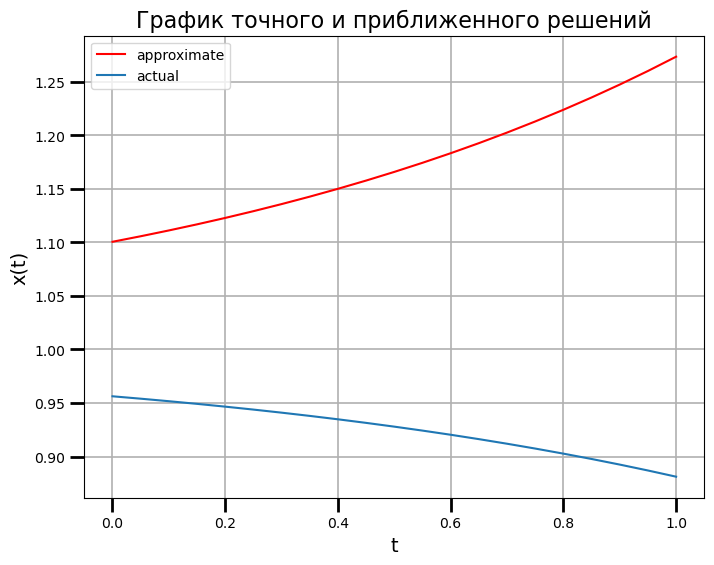

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("График точного и приближенного решений", fontsize=16)
ax.set_xlabel("t", fontsize=14)        
ax.set_ylabel("x(t)", fontsize=14)
ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.plot(grid, x_n, c="red", label="approximate")
ax.plot(grid, x_actual(grid), label="actual")
ax.legend()
ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)
plt.show()

In [121]:
def apriori_L2(epsilon, alpha):
    return math.floor(math.log(epsilon * (1 - alpha), alpha)) + 1

lambda_ = 1 / (9*(np.e - 1))
alpha = np.absolute(lambda_)*(np.e**2 - 1) / (2*np.e)
epsilon = 1e-3

n_apr_L2 = apriori_L2(epsilon, alpha)
print('apriori number of iterations: ' + str(n_apr_L2))

apriori number of iterations: 3
